# CS5100 Final Project

Name: Niyati Manish Khandelwal

Goal: This assignment will allow you to apply your knowledge of machine learning that you have aquired in this course on a real-world dataset of your choosing per the assignment specifications.

Complete the notebook and demonstrate your mastery of the topic.

## Prerequisites

In this section describe any packages that need to be installed or any additional setup that needs to take place before trying to run code.

In [43]:
pip install pyarrow

In [44]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn import metrics
from geopy.distance import geodesic

## Problem

In this project, we are using the New York City yellow taxi dataset to predict the fare price of the next trip.
Through this project, we will learn a couple of things including areas which have the highest fare rate, weekdays where taxi rides taken are of the highest fare, number of rides taken in each pickup hour, etc.
We will be visualizing the data using scatter plots, bar graphs, countplots and distplots.
 

## Data

In this section you will describe the dataset (corpus) you are using. Explain who collected the data, how they did it, the manner in which it was stored, the way you accessed the data, what steps you will have to do to clean it, and so on. Provide any relavent details.

The dataset we will be using is from the official NYC Taxi and Limousine Commission website - https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page.

We will be using the latest dataset i.e 2022 September Yellow Taxi Trip Records - https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-09.parquet. Description of each field of this dataset can be found in - data_dictionary_trip_records_yellow.pdf.

This dataset consists of fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data used in the dataset was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP).

The data is stored in PARQUET format. In order to access and use this data, I downloaded this dataset and read it into a dataframe here for analysis.

We will also make use of 'taxi_zones' file that I have created from the official GeoData Converter website. This file is created to get the exact latitude/longitude of each region of nyc as per the location ID. We will use this file to map our PULocationID (pick up location ID) to pickup_longitude and pickup_latitude. We will also map our DOLocationID (drop off location ID) to dropoff_longitude and dropoff_latitude.

There were several steps involved for cleaning of the data including removing null values, trips that had 0 passengers involved, etc. All these steps will be explained in the below 'Cleaning the Data' section.

## Cleaning the Data

Add the code to download/query you data. If your data is already downloaded, then load it into your program here. Then add the code to clean it.

In [47]:
df = pd.read_parquet('yellow_tripdata_2022-09.parquet', engine = 'pyarrow')
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-09-01 00:28:12,2022-09-01 00:36:22,1.0,2.10,1.0,N,100,239,1,9.0,3.0,0.5,1.8,0.00,0.3,14.60,2.5,0.0
1,1,2022-09-01 00:51:58,2022-09-01 01:14:43,1.0,8.70,1.0,N,161,243,2,27.5,3.0,0.5,0.0,0.00,0.3,31.30,2.5,0.0
2,1,2022-09-01 00:08:29,2022-09-01 00:26:29,1.0,8.30,1.0,N,138,233,1,25.0,3.0,0.5,2.0,6.55,0.3,37.35,2.5,0.0
3,2,2022-09-01 00:02:24,2022-09-01 00:09:39,1.0,1.32,1.0,N,238,166,2,7.5,0.5,0.5,0.0,0.00,0.3,8.80,0.0,0.0
4,2,2022-09-01 00:47:25,2022-09-01 00:56:09,1.0,2.94,1.0,N,161,226,2,10.5,0.5,0.5,0.0,0.00,0.3,14.30,2.5,0.0


In [48]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,3.183767e+06,3.067175e+06,3.183767e+06,3.067175e+06,3.183767e+06,3.183767e+06,3.183767e+06,3.183767e+06,3.183767e+06,3.183767e+06,3.183767e+06,3.183767e+06,3.183767e+06,3.183767e+06,3.067175e+06,3.067175e+06
mean,1.715380e+00,1.386320e+00,7.109279e+00,1.483464e+00,1.643820e+02,1.621447e+02,1.186873e+00,1.564404e+01,1.003977e+00,4.876840e-01,2.886925e+00,6.042836e-01,2.957686e-01,2.265776e+01,2.268221e+00,1.083513e-01
std,4.512374e-01,9.375647e-01,7.365036e+02,6.179802e+00,6.557936e+01,7.037223e+01,5.270220e-01,1.062375e+02,1.249544e+00,9.915776e-02,3.432636e+00,2.132655e+00,4.964102e-02,1.068255e+02,7.709993e-01,3.558345e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-8.000000e+02,-5.500000e+00,-5.500000e-01,-9.218000e+01,-3.450000e+01,-3.000000e-01,-7.903000e+02,-2.500000e+00,-1.250000e+00
25%,1.000000e+00,1.000000e+00,1.130000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,7.500000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e-01,1.236000e+01,2.500000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,1.940000e+00,1.000000e+00,1.610000e+02,1.620000e+02,1.000000e+00,1.100000e+01,5.000000e-01,5.000000e-01,2.220000e+00,0.000000e+00,3.000000e-01,1.656000e+01,2.500000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,3.780000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.750000e+01,2.500000e+00,5.000000e-01,3.560000e+00,0.000000e+00,3.000000e-01,2.436000e+01,2.500000e+00,0.000000e+00
max,5.000000e+00,9.000000e+00,3.031334e+05,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,1.874450e+05,2.800000e+01,3.300000e+00,7.112200e+02,1.560000e+02,3.000000e-01,1.874483e+05,2.750000e+00,1.250000e+00


In [49]:
df.shape

(3183767, 19)

In [50]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

#### Data Preprocessing

Step 1: Remove all null values.

In [51]:
df.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count          116592
trip_distance                 0
RatecodeID               116592
store_and_fwd_flag       116592
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge     116592
airport_fee              116592
dtype: int64

As we can see above, our dataset has minor missing values which are 116592 records maximum. So we can easily drop that data because our dataset is much larger with 3183767 rows.

In [52]:
df = df.dropna()

Step 2: Drop columns that are not required : store_and_fwd_flag, payment_type, extra, tip_amount, improvement_surcharge, total_amount, congestion_surcharge.

In [53]:
df = df.drop(['store_and_fwd_flag', 'payment_type', 'extra', 'tip_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge'],axis=1)

Step 3: Now, we will map our PULocationID to pickup_longitude and pickup_latitude
and we will map DOLocationID to dropoff_longitude and dropoff_latitude

In [54]:
latlong = pd.read_csv('taxi_zones.csv')
latlong

,X,Y,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough
0,-74.176786,40.689516,1,0.116357,0.000782,Newark Airport,1,EWR
1,-73.826126,40.625724,2,0.433470,0.004866,Jamaica Bay,2,Queens
2,-73.849479,40.865888,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx
3,-73.977023,40.724152,4,0.043567,0.000112,Alphabet City,4,Manhattan
4,-74.189930,40.550340,5,0.092146,0.000498,Arden Heights,5,Staten Island
...,...,...,...,...,...,...,...,...
258,-73.856351,40.899103,259,0.126750,0.000395,Woodlawn/Wakefield,259,Bronx
259,-73.903713,40.746798,260,0.133514,0.000422,Woodside,260,Queens
260,-74.012919,40.708976,261,0.027120,0.000034,World Trade Center,261,Manhattan
261,-73.945830,40.776534,262,0.049064,0.000122,Yorkville East,262,Manhattan


In [55]:
df2 = df.merge(latlong, left_on='PULocationID', right_on='LocationID')
df2.rename(columns={'X': 'pickup_longitude', 'Y': 'pickup_latitude'}, inplace=True)
df4 = df2.merge(latlong, left_on='DOLocationID', right_on='LocationID')
df4.rename(columns={'X': 'dropoff_longitude', 'Y': 'dropoff_latitude'}, inplace=True)
df =df4

In [56]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,mta_tax,...,LocationID_x,borough_x,dropoff_longitude,dropoff_latitude,OBJECTID_y,Shape_Leng_y,Shape_Area_y,zone_y,LocationID_y,borough_y
0,1,2022-09-01 00:28:12,2022-09-01 00:36:22,1.0,2.10,1.0,100,239,9.0,0.5,...,100,Manhattan,-73.978273,40.784107,239,0.063626,0.000205,Upper West Side South,239,Manhattan
1,1,2022-09-01 01:50:27,2022-09-01 01:59:31,1.0,2.30,1.0,100,239,9.5,0.5,...,100,Manhattan,-73.978273,40.784107,239,0.063626,0.000205,Upper West Side South,239,Manhattan
2,1,2022-09-01 07:09:15,2022-09-01 07:19:38,4.0,2.20,1.0,100,239,10.0,0.5,...,100,Manhattan,-73.978273,40.784107,239,0.063626,0.000205,Upper West Side South,239,Manhattan
3,2,2022-09-01 07:10:52,2022-09-01 07:21:36,1.0,2.33,1.0,100,239,10.0,0.5,...,100,Manhattan,-73.978273,40.784107,239,0.063626,0.000205,Upper West Side South,239,Manhattan
4,1,2022-09-01 08:01:46,2022-09-01 08:10:37,1.0,1.90,1.0,100,239,9.0,0.5,...,100,Manhattan,-73.978273,40.784107,239,0.063626,0.000205,Upper West Side South,239,Manhattan


In [57]:
display = df[["PULocationID", "DOLocationID", "pickup_longitude", "pickup_latitude", "dropoff_longitude", "dropoff_latitude"]]
display

,PULocationID,DOLocationID,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,100,239,-73.988786,40.753514,-73.978273,40.784107
1,100,239,-73.988786,40.753514,-73.978273,40.784107
2,100,239,-73.988786,40.753514,-73.978273,40.784107
3,100,239,-73.988786,40.753514,-73.978273,40.784107
4,100,239,-73.988786,40.753514,-73.978273,40.784107
...,...,...,...,...,...,...
3005023,125,84,-74.007176,40.725376,-74.173937,40.532017
3005024,5,84,-74.189930,40.550340,-74.173937,40.532017
3005025,68,99,-73.999940,40.748397,-74.187703,40.579618
3005026,140,99,-73.954568,40.765507,-74.187703,40.579618


In [58]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
fare_amount                     float64
mta_tax                         float64
tolls_amount                    float64
airport_fee                     float64
pickup_longitude                float64
pickup_latitude                 float64
OBJECTID_x                        int64
Shape_Leng_x                    float64
Shape_Area_x                    float64
zone_x                           object
LocationID_x                      int64
borough_x                        object
dropoff_longitude               float64
dropoff_latitude                float64
OBJECTID_y                        int64
Shape_Leng_y                    float64
Shape_Area_y                    float64


Step 4: Now, we are going to drop the unrequired features i.e 'PULocationID', 'DOLocationID', 'OBJECTID_x', 'Shape_Leng_x', 'Shape_Area_x', 'LocationID_x', 'zone_x', 'borough_x', 'OBJECTID_y', 'Shape_Leng_y', 'Shape_Area_y', 'zone_y','LocationID_y', 'borough_y'.

In [59]:
df = df.drop(['PULocationID', 'DOLocationID', 'OBJECTID_x', 'Shape_Leng_x', 'Shape_Area_x', 'LocationID_x'],axis=1)

In [60]:
df = df.drop(['zone_x', 'borough_x', 'OBJECTID_y', 'Shape_Leng_y', 'Shape_Area_y', 'zone_y', 'LocationID_y', 'borough_y'], axis=1)

In [61]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
fare_amount                     float64
mta_tax                         float64
tolls_amount                    float64
airport_fee                     float64
pickup_longitude                float64
pickup_latitude                 float64
dropoff_longitude               float64
dropoff_latitude                float64
dtype: object

Step 5: We will now remove data where the latitude and longitude of Pickup / Dropoff locations are invalid.

Latitude is always range between -90 to 90

Longitude is always range between -180 to 180

And whatever above this range is wrong data

First check any data above this range

In [62]:
def min_max():
    print(df['pickup_longitude'].max(),df['pickup_longitude'].min())
    print(df['pickup_latitude'].max(),df['pickup_latitude'].min())

    print(df['dropoff_longitude'].max(),df['dropoff_longitude'].min())
    print(df['dropoff_latitude'].max(),df['dropoff_latitude'].min())
min_max()

-73.7090705910379 -74.2295465457844
40.8998596211143 40.527298175003
-73.7090705910379 -74.2295465457844
40.8998596211143 40.527298175003


Since we see that none of the min/max values of latitudes/longitudes is out of range, there is no need to eliminate data here.

Step 5: Remove rows where pickup and drop location are same!

In [63]:
print(df[(df['pickup_longitude']==df['dropoff_longitude']) & (df['pickup_latitude']==df['dropoff_latitude'])].shape)

(141530, 14)


In [64]:
df=df[~((df['pickup_longitude']==df['dropoff_longitude']) & (df['pickup_latitude']==df['dropoff_latitude']))]

In [65]:
df.shape

(2863498, 14)

Step 6: Setting boundary for new york latitude longitude and removing rows where pickup/drop is out of this boundary.

In [66]:
boundary={"min_lat":40.573143,
         "min_lang":-74.252193,
         "max_lat":41.709555,
         "max_lang":-72.986532}

In [67]:
print(df[(df['pickup_latitude']<=boundary['min_lat']) | (df['pickup_latitude']>=boundary['max_lat'])].shape[0])
print(df[(df['pickup_longitude']<=boundary['min_lang']) | (df['pickup_longitude']>=boundary['max_lang'])].shape[0])
print(df[(df['dropoff_latitude']<=boundary['min_lat']) | (df['dropoff_latitude']>=boundary['max_lat'])].shape[0])
print(df[(df['dropoff_longitude']<=boundary['min_lang']) | (df['dropoff_longitude']>=boundary['max_lang'])].shape[0])

80
0
288
0


In [68]:
df=df[~((df['pickup_latitude']<=boundary['min_lat']) | (df['pickup_latitude']>=boundary['max_lat']))]
df=df[~((df['pickup_longitude']<=boundary['min_lang']) | (df['pickup_longitude']>=boundary['max_lang']))]

df=df[~((df['dropoff_latitude']<=boundary['min_lat']) | (df['dropoff_latitude']>=boundary['max_lat']))]
df=df[~((df['dropoff_longitude']<=boundary['min_lang']) | (df['dropoff_longitude']>=boundary['max_lang']))]

df.shape

(2863133, 14)

Visualizing the pick up data:

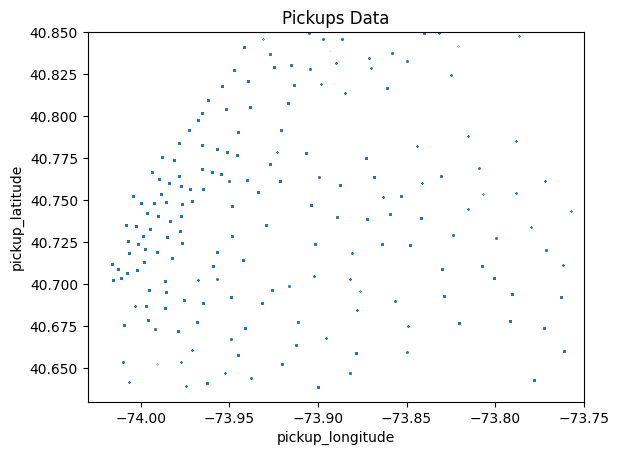

In [69]:
df.plot(y='pickup_latitude',x='pickup_longitude',kind="scatter",alpha=0.7,s=0.02)
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.title("Pickups Data")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

Visualizing the drop off data:

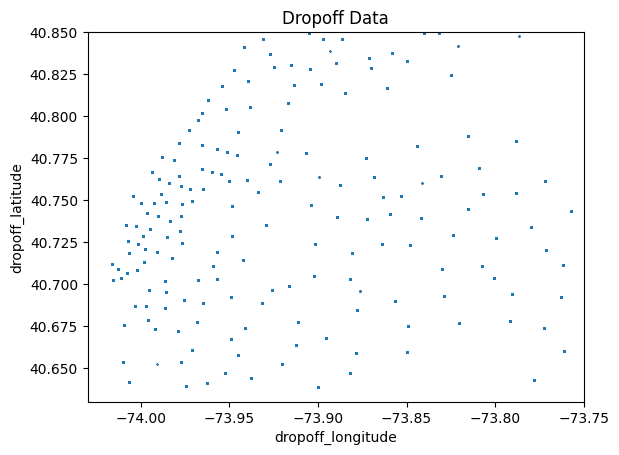

In [70]:
df.plot(y='dropoff_latitude',x='dropoff_longitude',kind="scatter",alpha=0.5,s=0.02)
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)
plt.title("Dropoff Data")

plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()

Step 7: Fare amount cannot be negative so we remove this data.

In [71]:
df[df['fare_amount']<=0]['fare_amount'].count()    

14302

In [72]:
df=df[~(df['fare_amount']<=0)]

Step 9: Cleaning the data with respect to passenger count

In [73]:
df['passenger_count']=df['passenger_count'].astype(int)
print(df['passenger_count'].max())
print(df['passenger_count'].min())

8
0


C:\Users\Niyati\AppData\Local\Temp\ipykernel_1952\3575461328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['passenger_count']=df['passenger_count'].astype(int)


<AxesSubplot: xlabel='count', ylabel='passenger_count'>

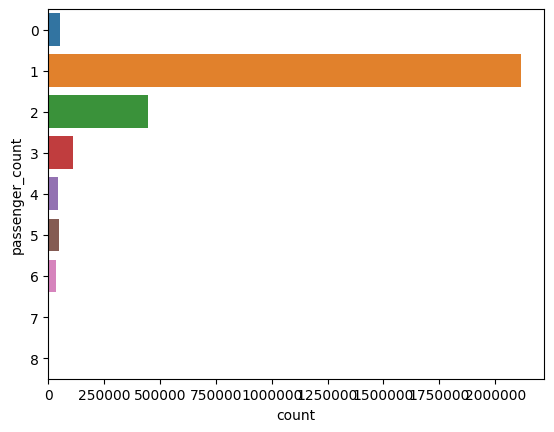

In [74]:
plt.ticklabel_format(style='plain', axis='x')
sns.countplot(y='passenger_count',data=df)

We observe that we have some rides where passenger count = 0. These trips are mostly due to cab drivers adding dummy rides just to increase their cab ride count. It is best to drop these kind of trips from our dataset.

In [75]:
df.loc[df['passenger_count'] == 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,fare_amount,mta_tax,tolls_amount,airport_fee,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
38,1,2022-09-02 00:40:35,2022-09-02 00:51:19,0,2.4,1.0,10.0,0.5,0.00,0.00,-73.988786,40.753514,-73.978273,40.784107
85,1,2022-09-03 14:53:15,2022-09-03 15:08:04,0,2.5,1.0,12.0,0.5,0.00,0.00,-73.988786,40.753514,-73.978273,40.784107
188,1,2022-09-07 14:54:32,2022-09-07 15:13:56,0,2.6,1.0,14.0,0.5,0.00,0.00,-73.988786,40.753514,-73.978273,40.784107
279,1,2022-09-10 16:28:03,2022-09-10 16:40:32,0,2.6,1.0,11.0,0.5,0.00,0.00,-73.988786,40.753514,-73.978273,40.784107
352,1,2022-09-12 22:08:12,2022-09-12 22:14:53,0,2.0,1.0,8.0,0.5,0.00,0.00,-73.988786,40.753514,-73.978273,40.784107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3004240,1,2022-09-05 14:27:20,2022-09-05 14:43:09,0,9.7,1.0,27.5,0.5,6.55,1.25,-73.872804,40.774867,-73.820705,40.841475
3004269,1,2022-09-03 18:52:46,2022-09-03 19:27:21,0,17.2,1.0,48.0,0.5,6.55,1.25,-73.778264,40.642605,-73.820705,40.841475
3004513,1,2022-09-25 13:34:19,2022-09-25 13:51:07,0,7.5,1.0,22.0,0.5,0.00,1.25,-73.778264,40.642605,-73.882138,40.646872
3004748,1,2022-09-01 13:41:52,2022-09-01 14:21:56,0,14.5,1.0,45.0,0.5,3.00,0.00,-73.993899,40.766692,-73.879067,40.894746


In [76]:
df.drop(df[df['passenger_count'] == 0].index, inplace = True)

C:\Users\Niyati\AppData\Local\Temp\ipykernel_1952\1524584400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['passenger_count'] == 0].index, inplace = True)


<AxesSubplot: xlabel='count', ylabel='passenger_count'>

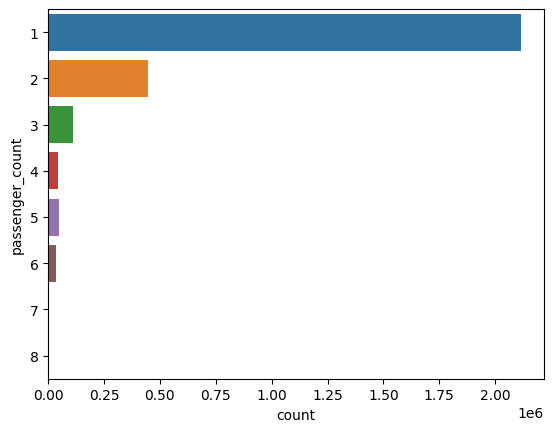

In [77]:
sns.countplot(y='passenger_count',data=df)

In [78]:
df=df[~((df['passenger_count']>6))]
df.shape

(2794981, 14)

<AxesSubplot: xlabel='count', ylabel='passenger_count'>

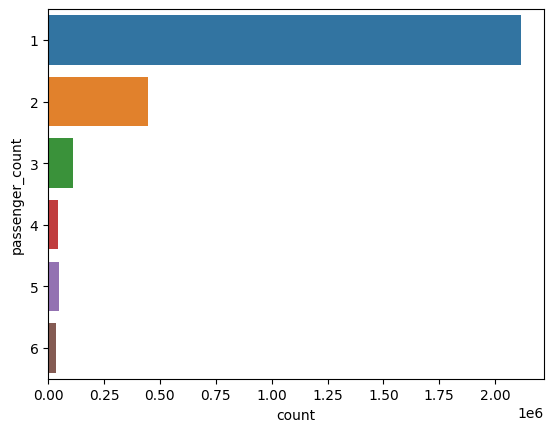

In [79]:
sns.countplot(y='passenger_count',data=df)

In [80]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,fare_amount,mta_tax,tolls_amount,airport_fee,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,1,2022-09-01 00:28:12,2022-09-01 00:36:22,1,2.10,1.0,9.0,0.5,0.0,0.0,-73.988786,40.753514,-73.978273,40.784107
1,1,2022-09-01 01:50:27,2022-09-01 01:59:31,1,2.30,1.0,9.5,0.5,0.0,0.0,-73.988786,40.753514,-73.978273,40.784107
2,1,2022-09-01 07:09:15,2022-09-01 07:19:38,4,2.20,1.0,10.0,0.5,0.0,0.0,-73.988786,40.753514,-73.978273,40.784107
3,2,2022-09-01 07:10:52,2022-09-01 07:21:36,1,2.33,1.0,10.0,0.5,0.0,0.0,-73.988786,40.753514,-73.978273,40.784107
4,1,2022-09-01 08:01:46,2022-09-01 08:10:37,1,1.90,1.0,9.0,0.5,0.0,0.0,-73.988786,40.753514,-73.978273,40.784107


## Feature Engineering

##### 1. Extract day from tpep_pickup_datetime

In [81]:
df['pickup_day']=pd.to_datetime(df.tpep_pickup_datetime,format='%Y-%m-%d %H:%M:%S UTC').dt.day

C:\Users\Niyati\AppData\Local\Temp\ipykernel_1952\1543458787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_day']=pd.to_datetime(df.tpep_pickup_datetime,format='%Y-%m-%d %H:%M:%S UTC').dt.day


In [82]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,fare_amount,mta_tax,tolls_amount,airport_fee,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_day
0,1,2022-09-01 00:28:12,2022-09-01 00:36:22,1,2.10,1.0,9.0,0.5,0.0,0.0,-73.988786,40.753514,-73.978273,40.784107,1
1,1,2022-09-01 01:50:27,2022-09-01 01:59:31,1,2.30,1.0,9.5,0.5,0.0,0.0,-73.988786,40.753514,-73.978273,40.784107,1
2,1,2022-09-01 07:09:15,2022-09-01 07:19:38,4,2.20,1.0,10.0,0.5,0.0,0.0,-73.988786,40.753514,-73.978273,40.784107,1
3,2,2022-09-01 07:10:52,2022-09-01 07:21:36,1,2.33,1.0,10.0,0.5,0.0,0.0,-73.988786,40.753514,-73.978273,40.784107,1
4,1,2022-09-01 08:01:46,2022-09-01 08:10:37,1,1.90,1.0,9.0,0.5,0.0,0.0,-73.988786,40.753514,-73.978273,40.784107,1


##### 2. Extract weekday from tpep_pickup_datetime

0 is Monday

6 is Sunday

In [83]:
df['pickup_weekday'] = pd.DatetimeIndex(df.tpep_pickup_datetime).dayofweek

C:\Users\Niyati\AppData\Local\Temp\ipykernel_1952\4271109461.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_weekday'] = pd.DatetimeIndex(df.tpep_pickup_datetime).dayofweek


##### 3. Extract pickup hour from tpep_pickup_datetime column

In [84]:
df['pickup_hour']=pd.to_datetime(df.tpep_pickup_datetime,format='%Y-%m-%d %H:%M:%S UTC').dt.hour
df.head()

C:\Users\Niyati\AppData\Local\Temp\ipykernel_1952\2585876509.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pickup_hour']=pd.to_datetime(df.tpep_pickup_datetime,format='%Y-%m-%d %H:%M:%S UTC').dt.hour


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,fare_amount,mta_tax,tolls_amount,airport_fee,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_day,pickup_weekday,pickup_hour
0,1,2022-09-01 00:28:12,2022-09-01 00:36:22,1,2.10,1.0,9.0,0.5,0.0,0.0,-73.988786,40.753514,-73.978273,40.784107,1,3,0
1,1,2022-09-01 01:50:27,2022-09-01 01:59:31,1,2.30,1.0,9.5,0.5,0.0,0.0,-73.988786,40.753514,-73.978273,40.784107,1,3,1
2,1,2022-09-01 07:09:15,2022-09-01 07:19:38,4,2.20,1.0,10.0,0.5,0.0,0.0,-73.988786,40.753514,-73.978273,40.784107,1,3,7
3,2,2022-09-01 07:10:52,2022-09-01 07:21:36,1,2.33,1.0,10.0,0.5,0.0,0.0,-73.988786,40.753514,-73.978273,40.784107,1,3,7
4,1,2022-09-01 08:01:46,2022-09-01 08:10:37,1,1.90,1.0,9.0,0.5,0.0,0.0,-73.988786,40.753514,-73.978273,40.784107,1,3,8


##### 4. Mid-night Trip
Let's add the feature called mid night trip since usually fares during night hours are high compare to day time

The trip between night 11'o clock to morning 5'o clock are labelled mid night trip

In [85]:
df['mid_night_trip']=((df['pickup_hour']>23) | (df['pickup_hour']<6)).astype(int)
df.head()

C:\Users\Niyati\AppData\Local\Temp\ipykernel_1952\4119953358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mid_night_trip']=((df['pickup_hour']>23) | (df['pickup_hour']<6)).astype(int)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,fare_amount,mta_tax,tolls_amount,airport_fee,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_day,pickup_weekday,pickup_hour,mid_night_trip
0,1,2022-09-01 00:28:12,2022-09-01 00:36:22,1,2.10,1.0,9.0,0.5,0.0,0.0,-73.988786,40.753514,-73.978273,40.784107,1,3,0,1
1,1,2022-09-01 01:50:27,2022-09-01 01:59:31,1,2.30,1.0,9.5,0.5,0.0,0.0,-73.988786,40.753514,-73.978273,40.784107,1,3,1,1
2,1,2022-09-01 07:09:15,2022-09-01 07:19:38,4,2.20,1.0,10.0,0.5,0.0,0.0,-73.988786,40.753514,-73.978273,40.784107,1,3,7,0
3,2,2022-09-01 07:10:52,2022-09-01 07:21:36,1,2.33,1.0,10.0,0.5,0.0,0.0,-73.988786,40.753514,-73.978273,40.784107,1,3,7,0
4,1,2022-09-01 08:01:46,2022-09-01 08:10:37,1,1.90,1.0,9.0,0.5,0.0,0.0,-73.988786,40.753514,-73.978273,40.784107,1,3,8,0


##### 5. Rush Hour Trip
New York City has rush hour means heavy traffic from 4 PM to 8 PM

So fare rates may differ from other time

In [86]:
df['rush_hour_trip']=((df['pickup_hour']>=16) & (df['pickup_hour']<=20)).astype(int)
df.head()

C:\Users\Niyati\AppData\Local\Temp\ipykernel_1952\37992619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rush_hour_trip']=((df['pickup_hour']>=16) & (df['pickup_hour']<=20)).astype(int)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,fare_amount,mta_tax,tolls_amount,airport_fee,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_day,pickup_weekday,pickup_hour,mid_night_trip,rush_hour_trip
0,1,2022-09-01 00:28:12,2022-09-01 00:36:22,1,2.10,1.0,9.0,0.5,0.0,0.0,-73.988786,40.753514,-73.978273,40.784107,1,3,0,1,0
1,1,2022-09-01 01:50:27,2022-09-01 01:59:31,1,2.30,1.0,9.5,0.5,0.0,0.0,-73.988786,40.753514,-73.978273,40.784107,1,3,1,1,0
2,1,2022-09-01 07:09:15,2022-09-01 07:19:38,4,2.20,1.0,10.0,0.5,0.0,0.0,-73.988786,40.753514,-73.978273,40.784107,1,3,7,0,0
3,2,2022-09-01 07:10:52,2022-09-01 07:21:36,1,2.33,1.0,10.0,0.5,0.0,0.0,-73.988786,40.753514,-73.978273,40.784107,1,3,7,0,0
4,1,2022-09-01 08:01:46,2022-09-01 08:10:37,1,1.90,1.0,9.0,0.5,0.0,0.0,-73.988786,40.753514,-73.978273,40.784107,1,3,8,0,0


#### 6. Calculate distance between pickup and drop coordinates

Trip distance and fare amount are directly corelated. If the distance increases, the fare amount increases as well.

We will use python's geopy library to add column trip_distance which will have distance between two coordinates

In [87]:
def distance_calculate(lat,long,drop_lat,drop_long):    
    newport_ri = (lat,long)
    cleveland_oh = (drop_lat,drop_long)
    dist=geodesic(newport_ri, cleveland_oh).km
    return dist

Since our dataset is very huge and calculating trip distance for each trip takes a lot of time, we will consider a fraction of our dataset for further processing as follows:

In [88]:
df = df.sample(frac=0.1)
df.shape

(279498, 19)

In [89]:
df['trip_distance']=list(map(distance_calculate,df['pickup_latitude'],df['pickup_longitude'],df['dropoff_latitude'],df['dropoff_longitude']))
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,fare_amount,mta_tax,tolls_amount,airport_fee,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,pickup_day,pickup_weekday,pickup_hour,mid_night_trip,rush_hour_trip
235013,2,2022-09-12 00:30:52,2022-09-12 00:48:38,2,9.025111,1.0,27.0,0.5,6.55,1.25,-73.872804,40.774867,-73.977432,40.758226,12,0,0,1,0
2296494,2,2022-09-13 16:01:29,2022-09-13 17:08:01,2,21.656089,2.0,52.0,0.5,0.00,0.00,-73.978367,40.764425,-73.778264,40.642605,13,1,16,0,1
40747,2,2022-09-15 21:28:08,2022-09-15 21:50:25,2,6.399089,1.0,17.5,0.5,0.00,0.00,-73.998678,40.728612,-73.978273,40.784107,15,3,21,0,0
2236208,2,2022-09-11 01:37:51,2022-09-11 01:44:06,1,0.548293,1.0,6.0,0.5,0.00,0.00,-73.984176,40.759845,-73.989857,40.762237,11,6,1,1,0
1833177,2,2022-09-01 21:54:02,2022-09-01 21:59:46,2,3.016133,1.0,6.5,0.5,0.00,0.00,-73.977432,40.758226,-73.956972,40.780491,1,3,21,0,0


#### 7. Mapping

Convert specific pickup and drop Coordinates into location

We have set the boundary for the JFK Airport, Manhattan, Brooklyn, LaGuardia, Bronx

In [90]:
#JFK Airport 
JFK={"min_long":-73.81,
    "min_lat":40.63,
    "max_long":-73.77,
    "max_lat":40.67}

#Manhattan 
Manhattan={
    "min_long":-74.02,
    "min_lat":40.70,
    "max_long":-73.93,
    "max_lat":40.85}

#Brooklyn
Brooklyn={
    "min_long":-74.01,
    "min_lat":40.62,
    "max_long":-73.96,
    "max_lat":40.70 }

#LaGuardia
LaGuardia={
    "min_long":-73.89,
    "min_lat":40.76,
    "max_long":-73.85,
    "max_lat":40.79}

#Bronx
Bronx={
    "min_long":-73.935,
    "min_lat":40.79,
    "max_long":-73.88,
    "max_lat":40.89}

place_mapping function which will take lat,lang and bounday area varibale it will map to particular area

It will return 1 if particular lat,lang's are within specific boundary.

e.g pickup coordinates which are within boundary for JFK Airport said to be JFK pickup trip and vice versa for drop

In [91]:
def place_mapping(lat,lang,place_area):
    if (lat>= place_area['min_lat']) & (lat<= place_area['max_lat']) & (lang>= place_area['min_long']) & (lang<= place_area['max_long']):
        return 1
    return 0

In [92]:
df['pickup_manhattan']=df.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],Manhattan),axis=1)
df['pickup_jfk']=df.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],JFK),axis=1)
df['pickup_brooklyn']=df.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],Brooklyn),axis=1)
df['pickup_bronx']=df.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],Bronx),axis=1)
df['pickup_laGuardia']=df.apply(lambda row:place_mapping(row['pickup_latitude'],row['pickup_longitude'],LaGuardia),axis=1)

In [93]:
df['drop_manhattan']=df.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],Manhattan),axis=1)
df['drop_jfk']=df.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],JFK),axis=1)
df['drop_brooklyn']=df.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],Brooklyn),axis=1)
df['drop_bronx']=df.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],Bronx),axis=1)
df['drop_laGuardia']=df.apply(lambda row:place_mapping(row['dropoff_latitude'],row['dropoff_longitude'],LaGuardia),axis=1)

Now, we can remove tpep_dropoff_datetime and tpep_pickup_datetime as we have got new useful features extracted out of it.

In [94]:
df=df.drop('tpep_dropoff_datetime',axis=1)
df=df.drop('tpep_pickup_datetime',axis=1)
df.head()

,VendorID,passenger_count,trip_distance,RatecodeID,fare_amount,mta_tax,tolls_amount,airport_fee,pickup_longitude,pickup_latitude,...,pickup_manhattan,pickup_jfk,pickup_brooklyn,pickup_bronx,pickup_laGuardia,drop_manhattan,drop_jfk,drop_brooklyn,drop_bronx,drop_laGuardia
235013,2,2,9.025111,1.0,27.0,0.5,6.55,1.25,-73.872804,40.774867,...,0,0,0,0,1,1,0,0,0,0
2296494,2,2,21.656089,2.0,52.0,0.5,0.00,0.00,-73.978367,40.764425,...,1,0,0,0,0,0,1,0,0,0
40747,2,2,6.399089,1.0,17.5,0.5,0.00,0.00,-73.998678,40.728612,...,1,0,0,0,0,1,0,0,0,0
2236208,2,1,0.548293,1.0,6.0,0.5,0.00,0.00,-73.984176,40.759845,...,1,0,0,0,0,1,0,0,0,0
1833177,2,2,3.016133,1.0,6.5,0.5,0.00,0.00,-73.977432,40.758226,...,1,0,0,0,0,1,0,0,0,0


Till here we have pre-processed our data and feature engineering is done

Save the pre-processed and feature engineered data in CSV file

In [95]:
df.to_csv("feature_model.csv",index=False)

In [96]:
df=pd.read_csv("feature_model.csv")
df.shape

(279498, 27)

In [97]:
df.dtypes

VendorID               int64
passenger_count        int64
trip_distance        float64
RatecodeID           float64
fare_amount          float64
mta_tax              float64
tolls_amount         float64
airport_fee          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
pickup_day             int64
pickup_weekday         int64
pickup_hour            int64
mid_night_trip         int64
rush_hour_trip         int64
pickup_manhattan       int64
pickup_jfk             int64
pickup_brooklyn        int64
pickup_bronx           int64
pickup_laGuardia       int64
drop_manhattan         int64
drop_jfk               int64
drop_brooklyn          int64
drop_bronx             int64
drop_laGuardia         int64
dtype: object

## Visuals

The next step is to get insight to data.

The aim here is to remove any noisy or outlier data and understand data distribution

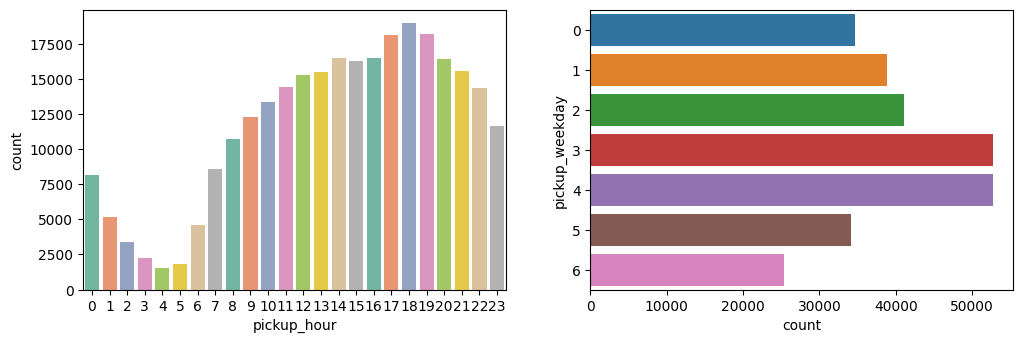

In [98]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,3)
sns.countplot(x='pickup_hour', data=df,palette='Set2')
plt.subplot(2,2,4)
sns.countplot(y='pickup_weekday', data=df)

plt.show()

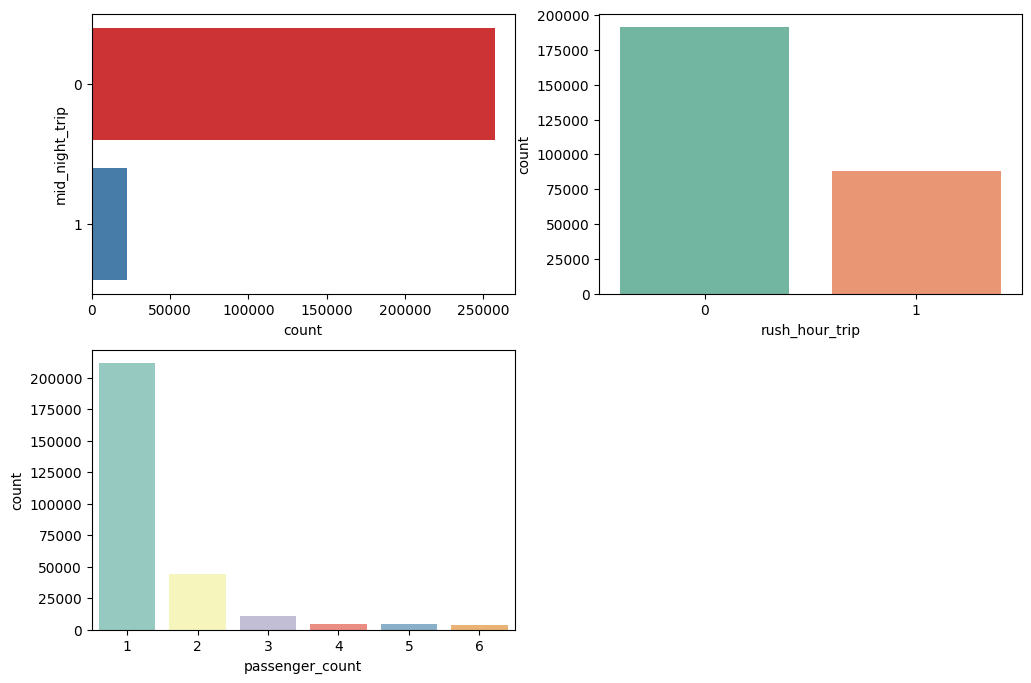

In [99]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.countplot(y='mid_night_trip', data=df,palette='Set1')

plt.subplot(2,2,2)
sns.countplot(x='rush_hour_trip', data=df,palette='Set2')

plt.subplot(2,2,3)
sns.countplot(x='passenger_count', data=df,palette='Set3')

plt.show()

<AxesSubplot: xlabel='pickup_laGuardia', ylabel='count'>

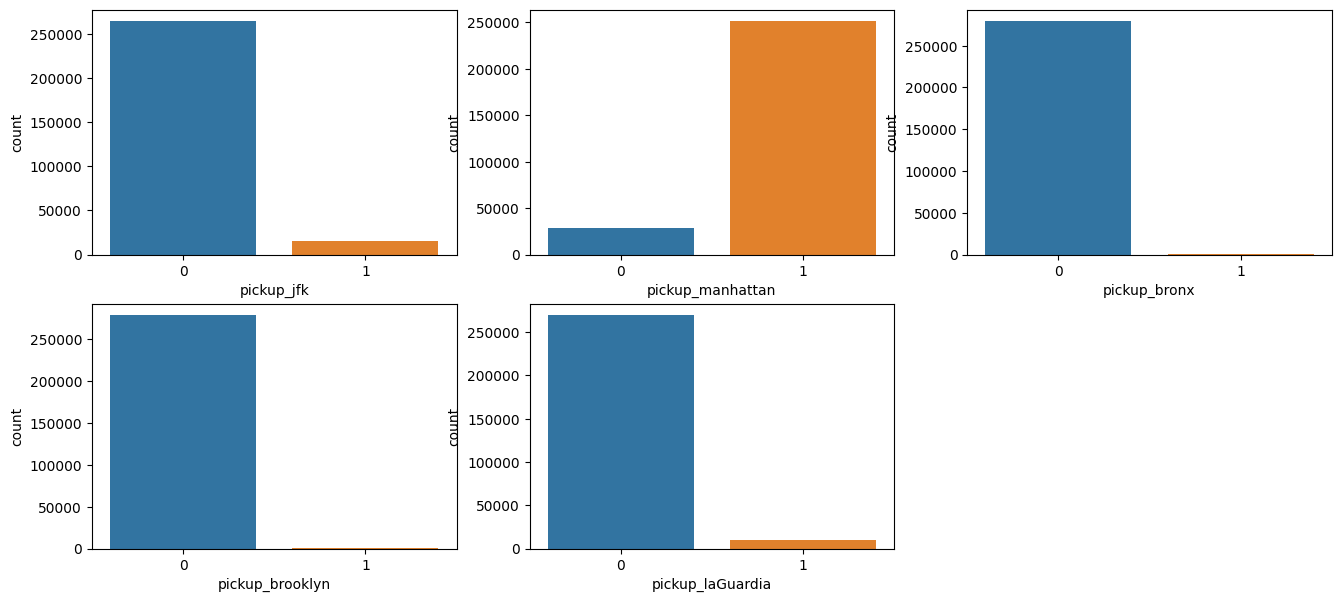

In [100]:
plt.figure(figsize=(16,7))
plt.subplot(2,3,1)
sns.countplot(x='pickup_jfk',data=df)
plt.subplot(2,3,2)
sns.countplot(x='pickup_manhattan',data=df)
plt.subplot(2,3,3)
sns.countplot(x='pickup_bronx',data=df)
plt.subplot(2,3,4)
sns.countplot(x='pickup_brooklyn',data=df)
plt.subplot(2,3,5)
sns.countplot(x='pickup_laGuardia',data=df)
#plt.show()

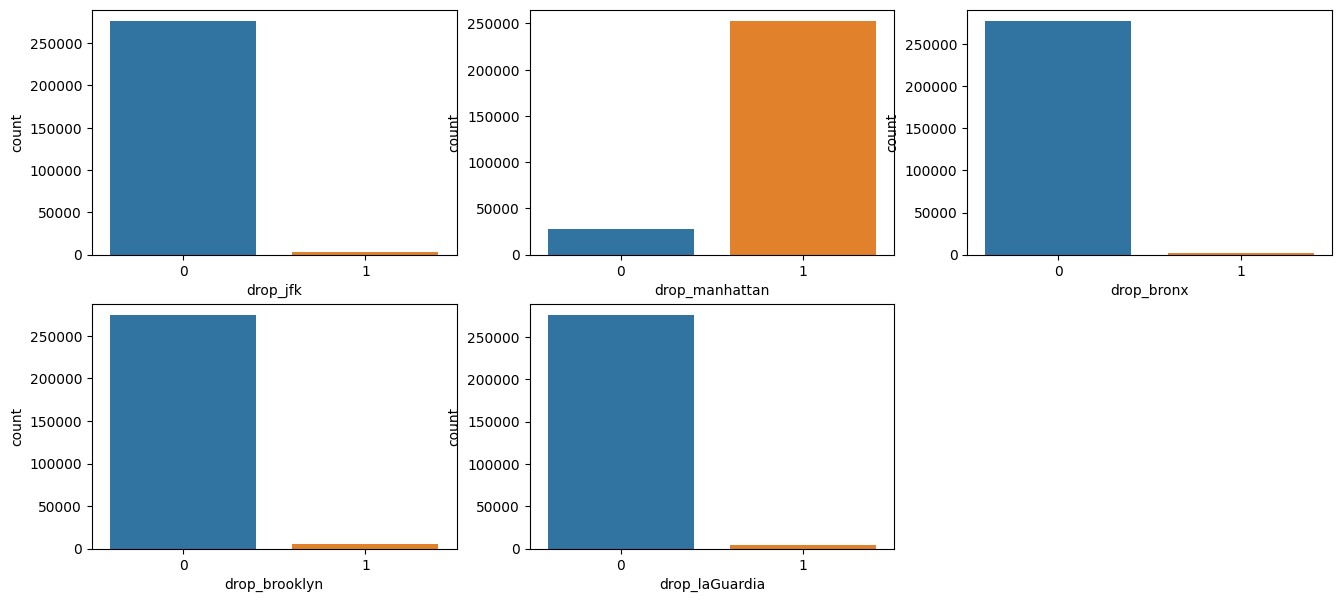

In [101]:
plt.figure(figsize=(16,7))
plt.subplot(2,3,1)
sns.countplot(x='drop_jfk',data=df)
plt.subplot(2,3,2)
sns.countplot(x='drop_manhattan',data=df)
plt.subplot(2,3,3)
sns.countplot(x='drop_bronx',data=df)
plt.subplot(2,3,4)
sns.countplot(x='drop_brooklyn',data=df)
plt.subplot(2,3,5)
sns.countplot(x='drop_laGuardia',data=df)
plt.show()

C:\Users\Niyati\AppData\Local\Temp\ipykernel_1952\304520470.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['fare_amount'],kde=True)
C:\Users\Niyati\AppData\Local\Temp\ipykernel_1952\304520470.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['trip_distance'],kde=True)


<AxesSubplot: xlabel='fare_amount', ylabel='trip_distance'>

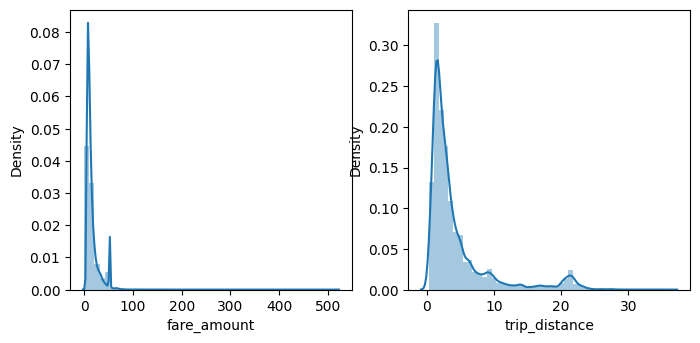

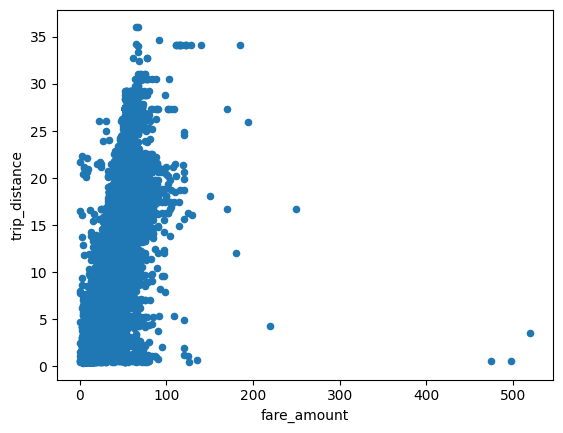

In [102]:
plt.figure(figsize=(8,8))

plt.subplot(2,2,1)
sns.distplot(df['fare_amount'],kde=True)

plt.subplot(2,2,2)
sns.distplot(df['trip_distance'],kde=True)

df.plot(x='fare_amount',y='trip_distance',kind='scatter')

Different Area Fare Distribution

In [103]:
df_manhattan=df[(df['pickup_manhattan']==1) | (df['drop_manhattan']==1)]
df_jfk=df[(df['pickup_jfk']==1) | (df['drop_jfk']==1)]
df_bronx=df[(df['pickup_bronx']==1) | (df['drop_bronx']==1)]
df_brooklyn=df[(df['pickup_brooklyn']==1) | (df['drop_brooklyn']==1)]
df_LGD=df[(df['pickup_laGuardia']==1) | (df['drop_laGuardia']==1)]

C:\Users\Niyati\AppData\Local\Temp\ipykernel_1952\4268132855.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_manhattan['fare_amount'],kde=True)
C:\Users\Niyati\AppData\Local\Temp\ipykernel_1952\4268132855.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_jfk['fare_amount'],kde=True)


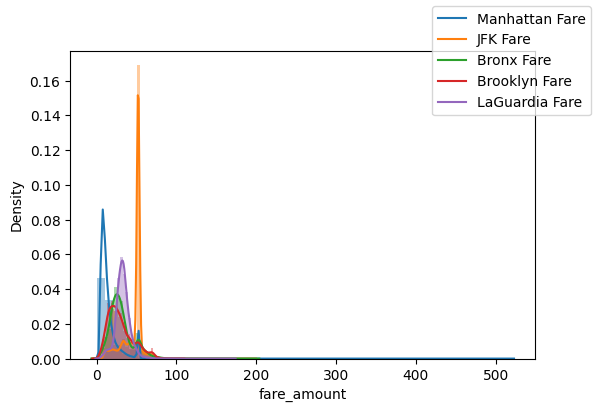

In [104]:
fig = plt.figure(figsize=(6,4))

sns.distplot(df_manhattan['fare_amount'],kde=True)
sns.distplot(df_jfk['fare_amount'],kde=True)
sns.distplot(df_bronx['fare_amount'],kde=True)
sns.distplot(df_brooklyn['fare_amount'],kde=True)
sns.distplot(df_LGD['fare_amount'],kde=True)
fig.legend(labels=['Manhattan Fare','JFK Fare','Bronx Fare','Brooklyn Fare','LaGuardia Fare'])
plt.show()

Fare Distribution at Different Time Zone

C:\Users\Niyati\AppData\Local\Temp\ipykernel_1952\2812551143.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df_mid['fare_amount']),ax=ax)
C:\Users\Niyati\AppData\Local\Temp\ipykernel_1952\2812551143.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df_non_mid['fare_amount'])

<AxesSubplot: xlabel='fare_amount', ylabel='Density'>

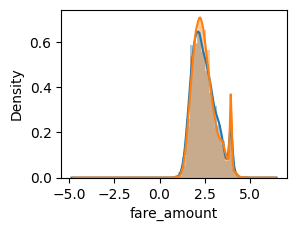

In [105]:
df_mid=df[df['mid_night_trip']==1]
df_non_mid=df[df['mid_night_trip']==0]
ax=plt.subplot(2,2,2)
sns.distplot(np.log(df_mid['fare_amount']),ax=ax)
sns.distplot(np.log(df_non_mid['fare_amount']),ax=ax)

C:\Users\Niyati\AppData\Local\Temp\ipykernel_1952\906114690.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df_rush_hour['fare_amount']),ax=ax)
C:\Users\Niyati\AppData\Local\Temp\ipykernel_1952\906114690.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df_non_rush_hour['fare

<AxesSubplot: xlabel='fare_amount', ylabel='Density'>

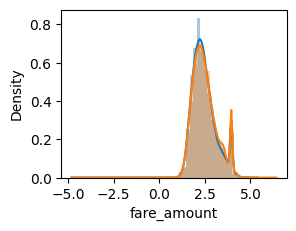

In [106]:
df_rush_hour=df[df['rush_hour_trip']==1]
df_non_rush_hour=df[df['rush_hour_trip']==0]
ax=plt.subplot(2,2,3)
sns.distplot(np.log(df_rush_hour['fare_amount']),ax=ax)
sns.distplot(np.log(df_non_rush_hour['fare_amount']),ax=ax)

In [107]:
df.dtypes

VendorID               int64
passenger_count        int64
trip_distance        float64
RatecodeID           float64
fare_amount          float64
mta_tax              float64
tolls_amount         float64
airport_fee          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
pickup_day             int64
pickup_weekday         int64
pickup_hour            int64
mid_night_trip         int64
rush_hour_trip         int64
pickup_manhattan       int64
pickup_jfk             int64
pickup_brooklyn        int64
pickup_bronx           int64
pickup_laGuardia       int64
drop_manhattan         int64
drop_jfk               int64
drop_brooklyn          int64
drop_bronx             int64
drop_laGuardia         int64
dtype: object

## Learning Model

In [108]:
# Assigning X and y variables
X = df.drop('fare_amount',1)
y = df['fare_amount']

C:\Users\Niyati\AppData\Local\Temp\ipykernel_1952\292947481.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = df.drop('fare_amount',1)


In [109]:
#Splitting the dataset into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

#### Building Linear Regression Model

In [110]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

In [111]:
#RMSE score 
lr_rmse = np.sqrt(metrics.mean_squared_error(lr_pred,y_test))
lr_rmse

4.550488092477989

In [112]:
#R2 score
lr_r2score = metrics.r2_score(lr_pred,y_test)
lr_r2score

0.8545365167438748

In [113]:
#Train Score
lr_train=lr.score(X_train,y_train)
lr_train

0.876245352488326

In [114]:
#Test Score
lr_test=lr.score(X_test,y_test)
lr_test

0.8730127137492674

#### Building Decision Tree Regressor Model

In [115]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt_pred=dt.predict(X_test)

In [116]:
#RMSE score 
dt_rmse = np.sqrt(metrics.mean_squared_error(dt_pred,y_test))
dt_rmse

4.907869000915506

In [117]:
#R2 score
dt_r2score = metrics.r2_score(dt_pred,y_test)
dt_r2score

0.8501267341337847

In [118]:
#Train Score
dt_train=dt.score(X_train,y_train)
dt_train

0.9980728367260089

In [119]:
#Test Score
dt_test=dt.score(X_test,y_test)
dt_test

0.8522830941457531

#### Building Random Forest Regressor Model

In [120]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)

In [121]:
#RMSE score 
rf_rmse = np.sqrt(metrics.mean_squared_error(rf_pred,y_test))
rf_rmse

3.7994030093747475

In [122]:
#R2 score
rf_r2score = metrics.r2_score(rf_pred,y_test)
rf_r2score

0.9040606739439255

In [123]:
#Train Score
rf_train=rf.score(X_train,y_train)
rf_train

0.9866875862887524

In [124]:
#Test Score
rf_test=rf.score(X_test,y_test)
rf_test

0.9114731517723216

#### Building AdaBoost Regressor Model

In [125]:
ab=AdaBoostRegressor()
ab.fit(X_train,y_train)
ab_pred=ab.predict(X_test)

In [126]:
#RMSE score 
ab_rmse = np.sqrt(metrics.mean_squared_error(ab_pred,y_test))
ab_rmse

6.050571175042768

In [127]:
#R2 score
ab_r2score = metrics.r2_score(ab_pred,y_test)
ab_r2score

0.6939835239527792

In [128]:
#Train Score
ab_train=ab.score(X_train,y_train)
ab_train

0.7927157643004238

In [129]:
#Test Score
ab_test=ab.score(X_test,y_test)
ab_test

0.7754893093228635

#### Building XGB Regressor Model

In [130]:
xgb= XGBRegressor()
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)

In [131]:
#RMSE score 
xgb_rmse = np.sqrt(metrics.mean_squared_error(xgb_pred,y_test))
xgb_rmse

3.719524792952345

In [132]:
#R2 score
xgb_r2score = metrics.r2_score(xgb_pred,y_test)
xgb_r2score

0.9076091728394906

In [133]:
#Train Score
xgb_train=xgb.score(X_train,y_train)
xgb_train

0.9483244758024587

In [134]:
#Test Score
xgb_test=xgb.score(X_test,y_test)
xgb_test

0.9151563793319661

#### Comparison of Models

In [135]:
#Creating dictionary for all the metrics and models
metrics = {'Metrics': ['RMSE Score','R2 Score','Train Score','Test Score'],'Linear Regression':[lr_rmse,lr_r2score,lr_train,lr_test],
          'Decision Tree Regressor':[dt_rmse,dt_r2score,dt_train,dt_test],'Random Forest Regressor':[rf_rmse,rf_r2score,rf_train,rf_test],
        'AdaBoost Regressor':[ab_rmse,ab_r2score,ab_train,ab_test],'XGBoost Regressor':[xgb_rmse,xgb_r2score,xgb_train,xgb_test]}

In [136]:
#Converting dictionary to dataframe
metrics = pd.DataFrame(metrics)
metrics

# smaller RMSE score, the better . Here XGBoost is the smallest.
# higher the R2 score, better is the mode. Here, XGBoost is the biggest.
# higher test score, better. Here, test score of XGBoost Regressor is the highest.

,Metrics,Linear Regression,Decision Tree Regressor,Random Forest Regressor,AdaBoost Regressor,XGBoost Regressor
0,RMSE Score,4.550488,4.907869,3.799403,6.050571,3.719525
1,R2 Score,0.854537,0.850127,0.904061,0.693984,0.907609
2,Train Score,0.876245,0.998073,0.986688,0.792716,0.948324
3,Test Score,0.873013,0.852283,0.911473,0.775489,0.915156


From the above table, we can see that XGBoost Regressor performs the best out of all the five models.

#### Cross Validation on XGBoost Regressor

In [137]:
data = xgboost.DMatrix(X, label = y)
params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'learning_rate': 0.3
}

xgb_cv = xgboost.cv(
  params = params,
  dtrain = data,
  nfold=10, # Number of folds to use
  metrics = 'rmse', # List of evaluation metrics to be used in cross validation, when it is not specified, the evaluation metric is chosen according to objective function.
  as_pandas = True,
  seed = 42,
  #early_stopping_rounds = 10, # Training with a validation set will stop if the performance doesn't improve for n rounds.
)

xgb_cv

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,14.003738,0.018487,14.012029,0.174336
1,10.233519,0.021092,10.254156,0.205878
2,7.716855,0.023397,7.758755,0.251325
3,6.091336,0.026292,6.161126,0.299132
4,5.087824,0.030202,5.182935,0.344186
5,4.491441,0.033180,4.611151,0.380308
6,4.144433,0.034081,4.291791,0.400225
7,3.944788,0.036651,4.110189,0.414840
8,3.816554,0.041909,4.013213,0.422683
9,3.737582,0.043329,3.954275,0.432999


#### Some visualization and analysis on predicted data by XGBoost Model

In [138]:
test_df = X_test.copy()
test_df["fare_amount_original"] = y_test
test_df["fare_amount_predicted"] = xgb_pred
test_df.head()

,VendorID,passenger_count,trip_distance,RatecodeID,mta_tax,tolls_amount,airport_fee,pickup_longitude,pickup_latitude,dropoff_longitude,...,pickup_brooklyn,pickup_bronx,pickup_laGuardia,drop_manhattan,drop_jfk,drop_brooklyn,drop_bronx,drop_laGuardia,fare_amount_original,fare_amount_predicted
205691,2,1,1.969732,1.0,0.5,0.0,0.0,-73.954325,40.817577,-73.965569,...,0,0,0,1,0,0,0,0,7.0,9.017797
158655,2,2,4.854479,1.0,0.5,0.0,0.0,-73.985929,40.748808,-74.016120,...,0,0,0,1,0,0,0,0,25.5,21.130247
37526,2,1,2.263386,1.0,0.5,0.0,0.0,-73.996778,40.742546,-73.989857,...,0,0,0,1,0,0,0,0,13.5,12.107370
32984,2,1,1.954153,1.0,0.5,0.0,0.0,-73.985929,40.748808,-73.965174,...,0,0,0,1,0,0,0,0,11.5,10.492877
176399,2,5,4.456747,1.0,0.5,0.0,0.0,-73.972815,40.791766,-73.988786,...,0,0,0,1,0,0,0,0,18.0,17.531523


Visualizing actual and predicted values

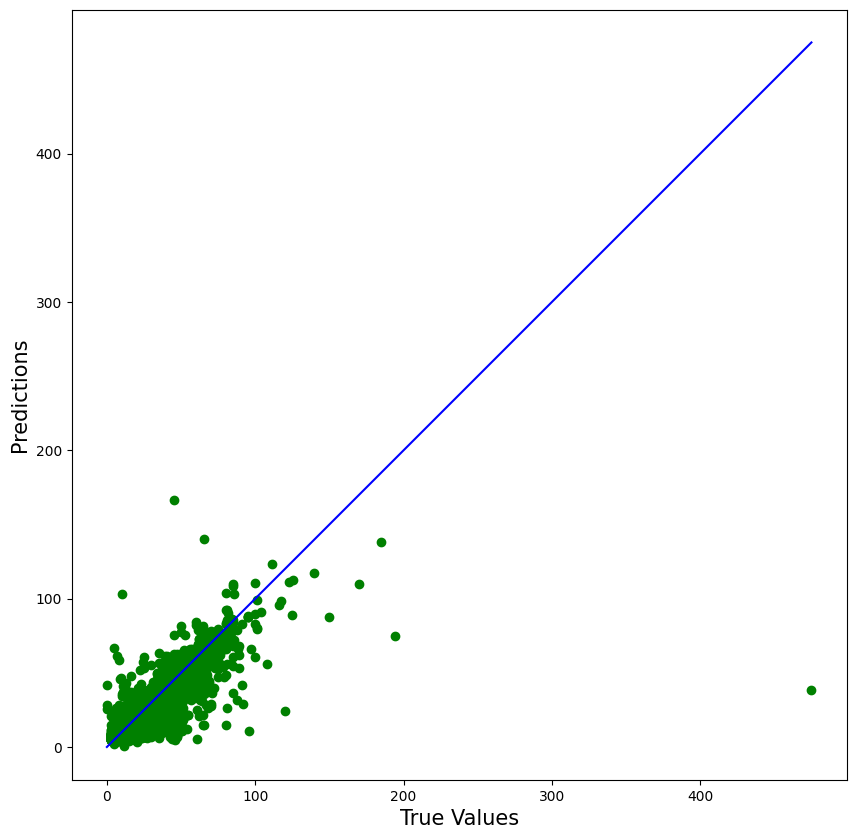

In [139]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, xgb_pred, c='green')
# plt.yscale('log')
# plt.xscale('log')

p1 = max(max(xgb_pred), max(y_test))
p2 = min(min(xgb_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

Visualizing relationship between trip distance and fare amount

As expected :- as the trip distance increases, fare amount should mostly increase.

Some outliers are observed. These outliers can be due to unusual pick ups / drops at emergency situations resulting to high fares even for a less distance

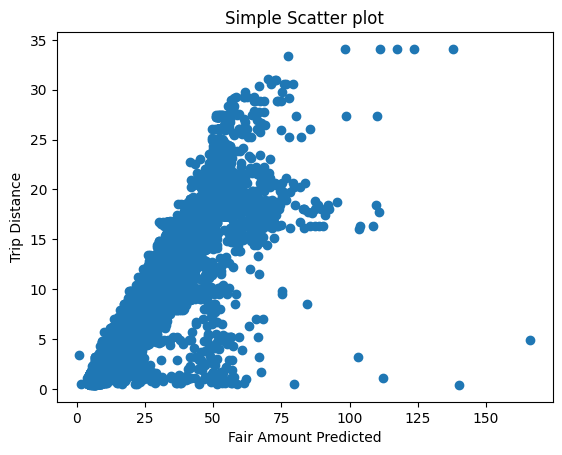

In [140]:
xaxis = test_df["fare_amount_predicted"]
yaxis = test_df["trip_distance"]
plt.scatter(xaxis, yaxis)
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
plt.title('Simple Scatter plot')
plt.xlabel('Fair Amount Predicted')
plt.ylabel('Trip Distance')
plt.show()

Which pick up area had the highest fare rate for a taxi trip?

(62911, 28)
(3802, 28)
(233, 28)
(66, 28)
(2395, 28)
166.26778
137.93304
68.32961
66.63534
109.99635


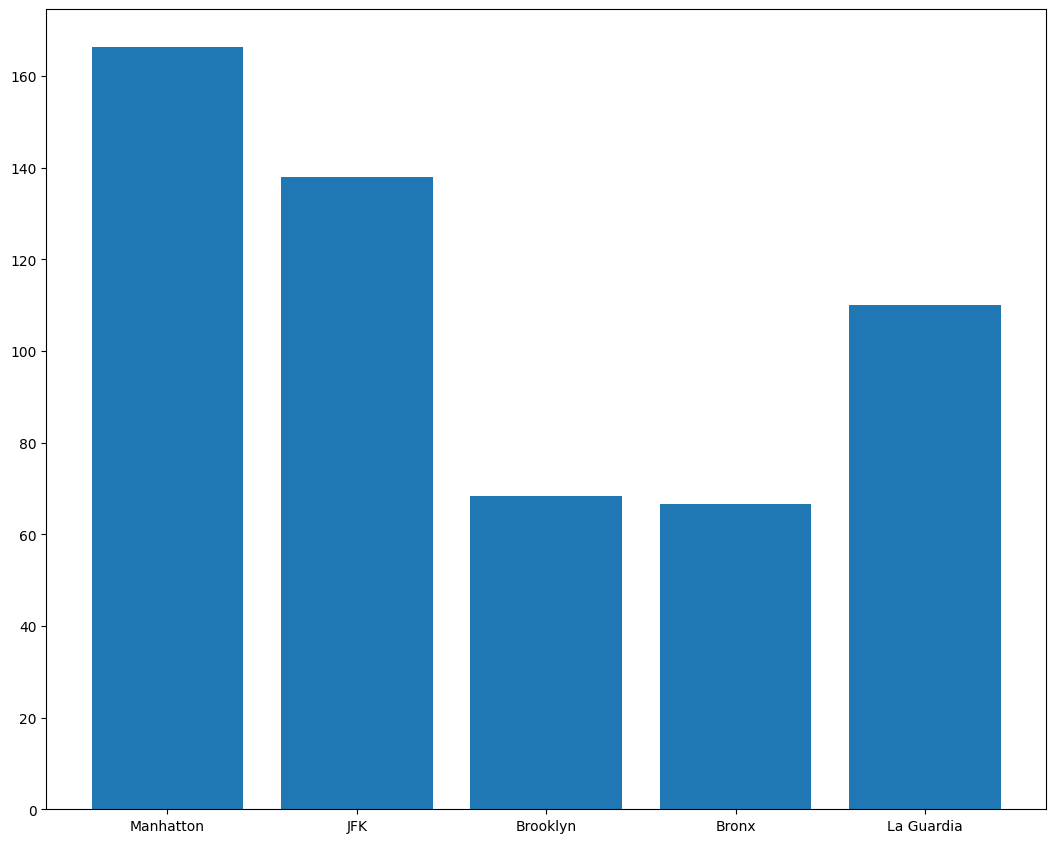

In [141]:
pickup_manhatton_df = test_df.loc[df['pickup_manhattan'] == 1]
pickup_jfk_df = test_df.loc[df['pickup_jfk'] == 1]
pickup_brooklyn_df = test_df.loc[df['pickup_brooklyn'] == 1]
pickup_bronx_df = test_df.loc[df['pickup_bronx'] == 1]
pickup_laGuardia_df = test_df.loc[df['pickup_laGuardia'] == 1]

print(pickup_manhatton_df.shape)
print(pickup_jfk_df.shape)
print(pickup_brooklyn_df.shape)
print(pickup_bronx_df.shape)
print(pickup_laGuardia_df.shape)

manhatton_max_price = pickup_manhatton_df['fare_amount_predicted'].max()
print(manhatton_max_price)

jfk_max_price = pickup_jfk_df['fare_amount_predicted'].max()
print(jfk_max_price)

brooklyn_max_price = pickup_brooklyn_df['fare_amount_predicted'].max()
print(brooklyn_max_price)

bronx_max_price = pickup_bronx_df['fare_amount_predicted'].max()
print(bronx_max_price)

laGuardia_max_price = pickup_laGuardia_df['fare_amount_predicted'].max()
print(laGuardia_max_price)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Manhatton', 'JFK', 'Brooklyn', 'Bronx', 'La Guardia']
students = [manhatton_max_price,jfk_max_price,brooklyn_max_price,bronx_max_price,laGuardia_max_price]
ax.bar(langs,students)
plt.show()

As we can visualize above, we can observe which area has the maximum fare rate in the month of September, 2022 in NYC.

Which weekday had the highest fare rate for a trip?

<AxesSubplot: xlabel='pickup_weekday'>

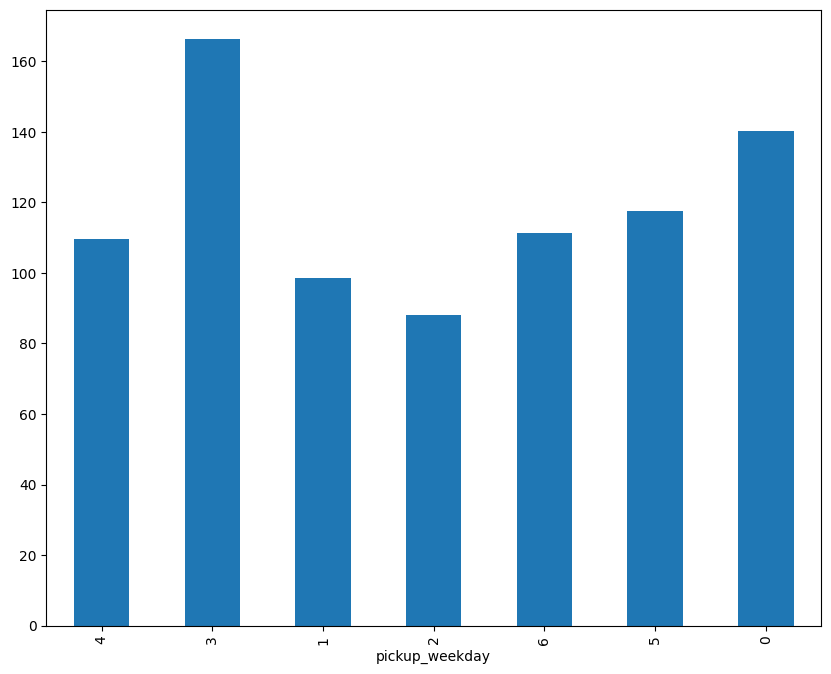

In [142]:
# Max price of weekdays: 0 - Monday, 6 - Sunday
test_df.groupby(['pickup_weekday'], sort=False)['fare_amount_predicted'].max().plot(kind = "bar")

In [143]:
df.dtypes

VendorID               int64
passenger_count        int64
trip_distance        float64
RatecodeID           float64
fare_amount          float64
mta_tax              float64
tolls_amount         float64
airport_fee          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
pickup_day             int64
pickup_weekday         int64
pickup_hour            int64
mid_night_trip         int64
rush_hour_trip         int64
pickup_manhattan       int64
pickup_jfk             int64
pickup_brooklyn        int64
pickup_bronx           int64
pickup_laGuardia       int64
drop_manhattan         int64
drop_jfk               int64
drop_brooklyn          int64
drop_bronx             int64
drop_laGuardia         int64
dtype: object

In [144]:
df.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID',
       'fare_amount', 'mta_tax', 'tolls_amount', 'airport_fee',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'pickup_day', 'pickup_weekday', 'pickup_hour',
       'mid_night_trip', 'rush_hour_trip', 'pickup_manhattan', 'pickup_jfk',
       'pickup_brooklyn', 'pickup_bronx', 'pickup_laGuardia', 'drop_manhattan',
       'drop_jfk', 'drop_brooklyn', 'drop_bronx', 'drop_laGuardia'],
      dtype='object')

## Refection

1. What issues did you encounter when aquiring and cleaning the data?

One of the main issues I faced with the data was the fact that for pickup and drop locations of any trip, instead of giving the longitutde and latitude values of those locations, we were provided with the location ID. There was a seperate Taxi Zone Lookup Table maintained - https://d37ci6vzurychx.cloudfront.net/misc/taxi+_zone_lookup.csv that consisted of the zone information of the location ID. Using the lookup file, I was then required to extract the longitude and latitudes of those zones from Geodata converter site - https://mygeodata.cloud/converter/shp-to-latlong. After this, I performed joins with my original dataset to get the pick up and drop off longitude and latitudes of the trips in my dataset.

2. What features did you use in your final model and why were others excluded?

In my final method, the features that I used were - 

VendorID, passenger_count, trip_distance, RatecodeID, fare_amount, mta_tax, tolls_amount, airport_fee, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, pickup_day, pickup_weekday, pickup_hour, mid_night_trip, rush_hour_trip, pickup_manhattan, pickup_jfk, pickup_brooklyn, pickup_bronx, pickup_laGuardia, drop_manhattan, drop_jfk, drop_brooklyn, drop_bronx, drop_laGuardia

Features that were excluded - 

store_and_fwd_flag, payment_type, extra, tip_amount, improvement_surcharge, total_amount, congestion_surcharge, PULocationID, DOLocationID, OBJECTID_x, Shape_Leng_x, Shape_Area_x, LocationID_x, zone_x, borough_x, OBJECTID_y, Shape_Leng_y, Shape_Area_y, zone_y,LocationID_y, borough_y, tpep_dropoff_datetime, tpep_pickup_datetime

These features were excluded because they did not have any effect on the fare_amount which is our target variable. 

store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor. This does not affect the fare price

payment_type - A numeric code signifying how the passenger paid for the trip. Again, this does not affect the fare price

extra, tip_amount, improvement_surcharge, total_amount, congestion_surcharge - are variables that contribute to the variable total_amount and not the fare_amount, hence they are dropped

PULocationID, DOLocationID, OBJECTID_x, Shape_Leng_x, Shape_Area_x, LocationID_x, zone_x, borough_x, OBJECTID_y, Shape_Leng_y, Shape_Area_y, zone_y,LocationID_y, borough_y - These variables were added during the join commands with the taxi_zones datasheet. They are extra and not required, hence dropped.

tpep_dropoff_datetime, tpep_pickup_datetime - We performed feature engineering from these variables and created more meaningful features. Hence these variables are dropped.


3. Which ML methods did you use and why? Which performed best before you started tuning? Did things change after tuning?

ML methods used -

Linear Regression, Decision Tree Regressor,	Random Forest Regressor, AdaBoost Regressor, XGBoost Regressor

I first selected Linear Regression since it was the easiest to implement, interpret and efficient to train.

Decision tree regressor was used because decision trees are not largely influenced by outliers or missing values. It can also handle both numerical and categorical variables.

Random Forest Regressor was selected since this model can handle large datasets efficiently. It also provides a higher level of accuracy in predicting outcomes over the decision tree algorithm.

Adaboost is less prune to overfitting as the input parameters are not jointly optimised and hence it was chosen.

Finally, XGBoost was chosen since it provides strong regularization and is very fast due to parallel processing. XGBoost also works really very with large datasets.

XGBoost performed best before I started tuning. No, XGBoost still performed the best even after tuning.

4. What was your accuracy before and then after cross validation?

Before cross validation, RSME was 3.305921. After cross validation, RSME was 3.740427.

5. What was the most challenging part of this project?

I think the most challenging part of the project was data pre-processing. This stage took quite some time. It was difficult to clean such a huge dataset and figure out each step on how to go about getting a cleaner dataset for our model analysis. As you can see above, several data cleaning steps have been performed before the analysis of the data begins. One main challenging step here was to categorize our pickup and drop data into different locations of New York City. However, this step was important and crucial as it would help us improve our analysis results. 

All in all, it was quite interesting at the same time to perform this type of high level data cleaning!